In [482]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
plt.style.use('fivethirtyeight')

# This makes sure that graphs render in your notebook
%matplotlib inline



# STATISTICS FUNDAMENTALS, PART1

## LEARNING OBJECTIVES

- Use NumPy and Pandas libraries to analyze datasets using basic summary statistics: mean, median, mode, max, min, quartile, inter-quartile range, variance, standard deviation, and correlation

- Create data visualizations - including: scatter plots, box plots, and histograms- to discern characteristics and trends in a dataset

- Identify a normal distribution within a dataset using summary statistics and visualization

- ID variable types and complete dummy coding by hand

## WHERE ARE WE IN THE DATA SCIENCE WORKFLOW?

![Data Science Workflow](../../resources/data-science-workflow-final.jpg)

# Linear Algebra Review

## Scalars, vectors and matrices

A **scalar** is a single number.

$$a$$

A **vector** is several numbers in sequence.

$$\vec{u} = \left[ \begin{array}{c}
1&3&7
\end{array} \right]$$

In [285]:
u = np.array([1, 3, 7])
u

array([1, 3, 7])

An m x n **matrix** is a rectangular array of numbers with m rows and n columns. Each number in the matrix is an entry. Entries can be denoted $a_{mn}$

$$A= \left[ \begin{array}{c}
a_{11} & a_{12} & ... & a_{1n}  \\
a_{21} & a_{22} & ... & a_{2n}  \\
... & ... & ... & ... \\
a_{m1} & a_{m2} & ... & a_{mn}
\end{array} \right]$$
$$A \in \mathbb{R}^{mn}$$

In [286]:
m = np.array([[1, 3, 7], [4, 6, 3], [2, 5, 6]])
m

array([[1, 3, 7],
       [4, 6, 3],
       [2, 5, 6]])

## Basic matrix algebra

### Addition and substaction
Vector **addition** is straightforward. If two vectors are of equal dimensions:

$\vec{v} = \left[ \begin{array}{c}
1 \\
3 \\
7
\end{array} \right],  \vec{w} = \left[ \begin{array}{c}
1 \\
0 \\
1
\end{array} \right]$

In [288]:
v = np.array([1, 3, 7])
w = np.array([1, 0, 1])

$\vec{v} + \vec{w} =
\left[ \begin{array}{c}
1 \\
3 \\
7
\end{array} \right] + \left[ \begin{array}{c}
1 \\
0 \\
1
\end{array} \right] = 
\left[ \begin{array}{c}
1+1 \\
3+0 \\
7+1
\end{array} \right] = 
\left[ \begin{array}{c}
2 \\
3 \\
8
\end{array} \right]
$

(Subtraction is similar.)

In [289]:
v + w

array([2, 3, 8])

### Scalar multiplication
We scale a vector with **scalar multiplication**, multiplying a vector by a scalar (single quantity):

$ 2 \left[ \begin{array}{c}
1 \\
3 \\
7
\end{array} \right] = 
 \left[ \begin{array}{c}
2*1 \\
2*3 \\
2*7
\end{array} \right] = 
 \left[ \begin{array}{c}
2 \\
6 \\
14
\end{array} \right]$ 

In [290]:
2*np.array([1, 3, 7])

array([ 2,  6, 14])

### Dot product
The **dot product** of two _n_-dimensional vectors is:

$ \vec{v} \cdot \vec{w} =\sum _{i=1}^{n}v_{i}w_{i}=v_{1}w_{1}+v_{2}w_{2}+\cdots +v_{n}w_{n} $

So, if:

$\vec{v} = \left[ \begin{array}{c}
1 \\
3 \\
7
\end{array} \right], \vec{w} = \left[ \begin{array}{c}
1 \\
0 \\
1
\end{array} \right]$

$ \vec{v} \cdot \vec{w} = 1*1 + 3*0 + 7*1 = 8 $

In [292]:
v = np.array([1, 3, 7])
w = np.array([1, 0, 1])
v.dot(w)

8

### Matrix multiplication
**Matrix multiplication**, $A_{mn} * B_{ij}$, is valid when the left matrix has the same number of columns as the right matrix has rows ($n = i$). Each entry is the dot product of corresponding row and column vectors.

![](./assets/images/matrix-multiply-a.gif)
(Image: mathisfun.com!)

In [293]:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[7, 8], [9, 10], [11, 12]])
A.dot(B)

array([[ 58,  64],
       [139, 154]])

### Vector norm
The **magnitude** of a vector $\vec{v} \in \mathbb{R}^{n}$ in is interpretable as its length in n-dimensional space, and is calculable via the Euclidean distance:

$\vec{v} = \left[ \begin{array}{c}
v_{1} \\
v_{2} \\
\vdots \\
v_{n}
\end{array} \right]$

then $\| \vec{v} \| = \sqrt{v_{1}^{2} + v_{2}^{2} + ... + v_{n}^{2}} = \sqrt{v^Tv}$

E.g. if $\vec{v} = 
\left[ \begin{array}{c}
3 \\
4
\end{array} \right]$, then $\| \vec{v} \| = \sqrt{3^{2} + 4^{2}} = 5$

This is also called the vector **norm**. You will see this often in machine learning as least squares.

In [291]:
np.linalg.norm(np.array([3,4]))

5.0

## Applications to machine learning
### Distance between actual values and predicted values
We often need to know the difference between predicted values and actual values.
We calculate this as:
$$\| \vec{actual} - \vec{predicted} \| =\sqrt{(actual_1 - predicted_1)^2 + (actual_2 - predict_2)^2}$$
<a id="least-squares"></a>
<a id="least-squares"></a>
<a id="least-squares"></a>
### Least squares
Many machine learning models are composed in the following form:
$$\min \| \vec{y} - f(X) \|$$
The goal is to minimize the distance between model predictions and actual data.

Let's see this in sklearn http://scikit-learn.org/stable/modules/linear_model.html

## Read in the titanic dataset


##### CODEALONG
Objective: Read in the Titanic data and look at a few summary statistics

In [276]:
# import Pandas
import pandas as pd

In [277]:
# If you don't have git use this link: http://bit.ly/2ae8zAT
#titanic = pd.read_csv('http://bit.ly/2ae8zAT')
titanic = pd.read_csv('../../dataset/titanic.csv')

In [490]:
# Preview columns
titanic.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [491]:
# Preview data dimensions
titanic.shape

(891, 12)

In [492]:
# What are the column data types?
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [493]:
# Look at the first 5 rows
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [496]:
# Can we preview the plcass variable?
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [280]:
# Pull up descriptive statistics for each variables
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Graham, Mr. George Edward",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
# Uh oh, we have some missing values, but we won't do anything with them for now

##### REAL WORLD APPLICATION - Preview data and temporarily clean up missing values

- Whenever you get a new dataset, the fastest way to find mistakes and inconsistencies is to look at the descriptive statistics
  - If anything look too high or too low relative to your experience, there may be issues with the data collection
- Your data may have a lot of missing values and may need to be cleaned meticulously before being combined with other data
  - You can take a quick average or moving average to smooth out the data and combine that to preview your results before you embark on your much longer data cleaning journey
  - Sometimes filling in missing values with their means or medians will be the best solution for dealing with missing data other times you may want to drop the offending rows or do real imputation.

## STATISTICS FUNDAMENTALS
Objective: Review mean, median, mode, interquartile-range, variance, and standard deviation in Pandas

#### A QUICK REVIEW OF NOTATION

The sum of a constant, k,  n times
$$\sum_{i=1}^nk$$

In [294]:
# k + k + k + k + ... + k

The sum of all numbers from 1 up to n:
$$\sum_{i=1}^ni$$

In [295]:
# 1 + 2 + 3 + ... + n

The sum of all x from the first x entry to the nth x entry:
$$\sum_{i=0}^nx_i$$

In [296]:
# x_1 + x_2 + x_3 + ... + x_n

##### Codealong

In [ ]:
# Compute the sum of 7 4s using base Python
print "Sum of 7 4s:", 

In [ ]:
# Compute the sum of 7 4s using base NummPy
print "Sum of 7 4s:", 

In [497]:
# Compute the sum of 1 through 10 using base Python
print "Sum of 1 through 10:", 

Sum of 1 through 10:


In [ ]:
# Using the titanic.fare column compute the total fare paid by passengers
print "Total fare using Numpy:", 
print "Total fare using Pandas:", 

#### MEASURES OF CENTRAL TENDENCY

- mean
- median
- mode

#### MEAN
The mean, also known as an average or the expected value is defined as:
$$E[X] = \bar{X} =\frac 1n\sum_{i=1}^nx_i$$

#### MEDIAN
The median refers to the midpoint in a series of numbers.

$$ 0,1,2,[3],5,5,9 $$

$$ 1,3,4,[4,5],5,5,7 $$

To find the median:
- Arrange the numbers in order smallest to 
  largest.

- If there is an odd number of values, the 
  middle value is the median.

- If there is an even number of values, the 
  average of the middle two values is the 
  median.


#### MODE
The mode of a set of values is the value that occurs most often.
A set of values may have more than one mode or no mode.

$$1,0,1,5,7,8,9,3,4,1$$ 1 is the mode since it occurs the most often

##### Codealong

In [ ]:
# Find the mean of the titanic.fare series using base Python
print "Mean titanic fare:", 

In [ ]:
# Find the mean of the titanic.fare series using NumPy
print "Mean titanic fare:", 

In [ ]:
# Find the mean of the titanic.fare series using Pandas
print "Mean titanic fare:", 

In [ ]:
# What was the median fare paid (using Pandas)?
print "Median titanic fare:", 

In [ ]:
# The mean and median are not the same, does this tell you anything about the fares?
# Let's discuss

In [ ]:
# Use Pandas to find the most common fare paid on the Titanic
print "The most common fare is:", 

##### MATH REVIEW
**How do we measure distance?**

One method is two take the difference between two points
$$X_2 - X_1$$

However, this can be inconvenient due to negative numbers.

We often use this square root trick to deal with negative numbers
$$\sqrt{(X_2-X_1)^2}$$

**What about distance in multiple dimensions?**

We can turn to the Pythagorean theorem
$$a^2 + b^2 = c^2$$

To find the distance along a diagnal it is sufficient to measure one dimension at a time
$$\sqrt{a^2 + b^2} = c$$

More generally we can write this as (You'll see this in machine learning papers)
$$\|X\|_2 = \sqrt{\sum{x_i^2}} = c$$

If we want to work with points rather than distances, we can write
$$\sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2} = c$$
or
$$\sqrt{\sum{(x_i - y_i)^2}} = c$$

##### KNOWLEDGE CHECK

In [ ]:
# How much younger is the youngest person on the titanic compared to the average person on the titanic?


In [ ]:
# Use the square root trick to make sure we have a positive distance


### STANDARD DEVIATION & VARIANCE

Standard deviation (SD, σ for population, s for sample)  is a measure that is used to quantify the amount of variation or dispersion of a set of data values.

Standard deviation is the square root of variance.
$$variance = \frac {\sum{(x_i - \bar{X})^2}} {n-1}$$

$$s = \sqrt{\frac {\sum{(x_i - \bar{X})^2}} {n-1}}$$

That can be a lot to take in so let's break it down in Python

In [304]:
# Take the first 5 rows of titanic age data
first_five = titanic.Age[:5]
print first_five

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64


In [305]:
# Calculate mean by hand
mean = (22 + 38 + 26 + 35 + 35)/5.0

In [311]:
# Calculate variance by hand
(np.square(22 - mean) +
np.square(38 - mean) +
np.square(26 - mean) +
np.square(35 - mean) +
np.square(35 - mean))/4.0

46.699999999999996

In [312]:
# Verify with Pandas
print first_five.var()
print first_five.std()

46.7
6.83373982531


## Our first model

Let's make our first model from scratch. We'll predict the fare column in the titanic data. What data will we use? Actually, none.

The simplest model we can build is an estimation of the mean, median, or most common value. If we have no feature matrix and only an outcome, this is the best approach to make a prediction based only on data. 

This seems silly, but we'll actually use it all the time to create a baseline of how well we do with no data, and whether our more sophisticated models make an improvement.

http://scikit-learn.org/stable/modules/model_evaluation.html#dummy-estimators

In [498]:
# Get the Fare column from the titanic data and store as y
y = titanic['Fare']

In [503]:
# Stored predictions in y_pred
y_pred = y.median()

In [505]:
# Use the least squares (euclidean distance) formula to see how close our predictions are
np.sum(np.square(y-y_pred))

2781.728094569506

### A SHORT INTRO TO BIAS AND VARIANCE (There will be more intros)

In simple terms, **Bias** shows how on target a model is in its predictions.

**Variance** shows how reliable a model in its performance.

These characteristics have important interactions, but we will save that for later.

![Bias and Variance](assets/images/biasVsVarianceImage.png)

In the following notation $f$ refers to a perfect model while $\hat{f}$ refers to our model.

**Bias**

Error due to bias is calculated at the difference between the expected prediction of our model and the correct value we are trying to predict.
$$Bias = E[\hat{f}(x)] - f(x)$$

**Variance**

Error due to variance is taken as the variability of a model prediction for a given point.

$$Variance = E[(\hat{f}(x) - E[\hat{f}(x)])^2]$$

In [328]:
heights = np.random.rand(200) + 6.5

In [318]:
def plot_means(sample_size):
    true_mean = np.mean(heights)
    mean_heights = []
    for n in range(5,sample_size):
        for j in range(30):
            mean_height = np.mean(np.random.choice(heights, n, replace=False))
            mean_heights.append((n, mean_height))
    sample_height = pd.DataFrame(mean_heights, columns=['sample_size', 'height'])
    sample_height.plot.scatter(x='sample_size', y='height', figsize=(14, 4))
    plt.axhline(y=true_mean, c='r')
    plt.title("The Bias and Variance of the Mean Estimator")
    plt.show()

In [329]:
def plot_variances(sample_size):
    true_variance = np.var(heights)
    var_heights = []
    for n in range(5,sample_size):
        for j in range(30):
            var_height1 = np.var(np.random.choice(heights, n, replace=False), ddof=0)
            var_height2 = np.var(np.random.choice(heights, n, replace=False), ddof=1)
            var_heights.append((n, var_height1, var_height2))
    sample_var = pd.DataFrame(var_heights, columns=['sample_size', 'variance1', 'variance2'])
    sample_var.plot.scatter(x='sample_size', y='variance1', figsize=(14, 4))
    plt.axhline(y=true_variance, c='r')
    plt.title("The Bias and Variance of the Population Variance Estimator")
    sample_var.plot.scatter(x='sample_size', y='variance2', figsize=(14, 4))
    plt.axhline(y=true_variance, c='r')
    plt.title("The Bias and Variance of the Sample Variance Estimator")
    plt.show()

In [358]:
interact(plot_means, sample_size=(5,200));

- The red line above is the true average height, but because we don't want to ask 200 people about their height, we take a sample.

- The blue dots show the estimate of the average height after taking a sample. To give us an idea of how sampling works, we simulate taking multiple sample.

- The X axis shows the sample size we take, the blue dots show the likely average heights we'll conclude for a given sample size.

- Even though the true average height is around 7 feet, a small sample may lead us to think that it's actually 6.7 or 7.3 feet. 

- Notice that the red line is in the center of our estimates. On average, we are correct and have no bias.

- If we take a larger sample size we get a better estimate. Meaning that the variance of our estimate gets smaller with larger samples sizes.

In [359]:
interact(plot_variances, sample_size=(5,200));

- Not all estimators are created equal.

- The top graph is the Population Variance estimator, while the bottom graph is the Sample Variance estimator.

- This is very subtle, but notice that the Population Variance estimator is not centered on the red line. It's actually biased and consistently underestimates the true variance, especially at low sample sizes.

- You may also notice that the scatter of the Sample Variance estimator is smaller. That means the variance of the sample variance estimator is smaller. That phrase can be really confusing, it's the variability of the estimator. 

- Play around with the sliders to get a good view of the graphs.

### CORRELATION AND ASSOCIATION
Correlation measures how variables related to each other.

Typical when we talk about the pearson correlation coefficient which is a measure of **linear** association

We refer to perfect correlation as colinearity

![Example correlation values](assets/images/correlation_examples.png)

##### CODEALONG - Correlation in Pandas
Objective: Explore options for measuring and visualizing correlation in Pandas

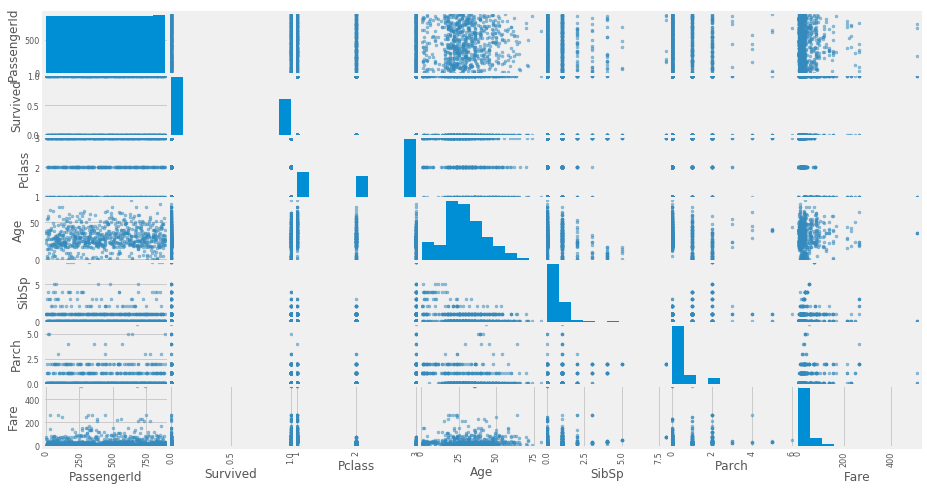

In [352]:
# Display the correlation matrix for all titanic variables
pd.scatter_matrix(titanic, figsize=(14, 8));

In [353]:
# Show the correlation of just survived and fare
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


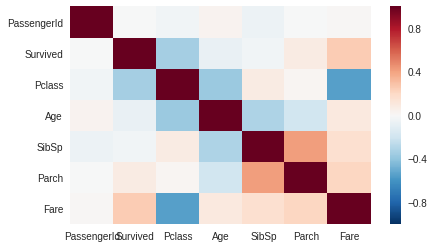

In [481]:
# Use seaborn to plot a correlation heatmap
sns.heatmap(titanic.corr())

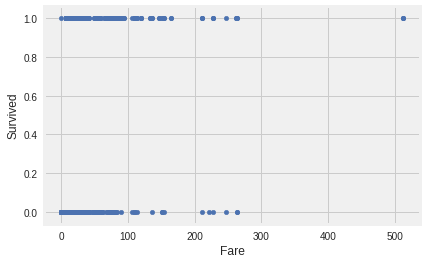

In [480]:
# Take a closer look at survived and fare using a scatter plot
titanic.plot.scatter(x='Fare', y='Survived')
# Is correlation a good way to inspect the association of fare and survival?

# IS THIS NORMAL?
Objective: Introduce normal (gaussian distributions) and how to identify them

#####  Math Review
- What is an event space?
  - A listing of all possible occurances
- What is a probability distribution?
  - A function that describes how events occur in an event space
- What are general properties of probability distributions?
  - All probabilities of an event are between 0 and 1
  - The probability that something occurs is almost certain or 1.
  

##### THE NORMAL DISTRIBUTION
- A normal distribution is often a key assumption to many models.
  - In practice if the normal distribution assumption is not met, it's not the end of the world. Your model is just a bit less efficient in most cases.

- The normal distribution depends upon the mean and the standard deviation.

- The mean determines the center of the distribution.  The standard deviation determines the height and width of the distribution.

- Normal distributions are symmetric, bell-shaped curves.

- When the standard deviation is large, the curve is short and wide.

- When the standard deviation is small, the curve it tall and narrow.

![normal distribution](assets/images/normal.png)


##### WHY DO WE THINK ABOUT NORMAL DISTRIBUTIONS?
- Show up in nature very often
- Aggregated processes tend to distribute normally regardless of their underlying distribution provided that the processes are uncorrelated or weakly correlated (Central Limit Theorem)
- Good simplification that makes it easy to make approximations.

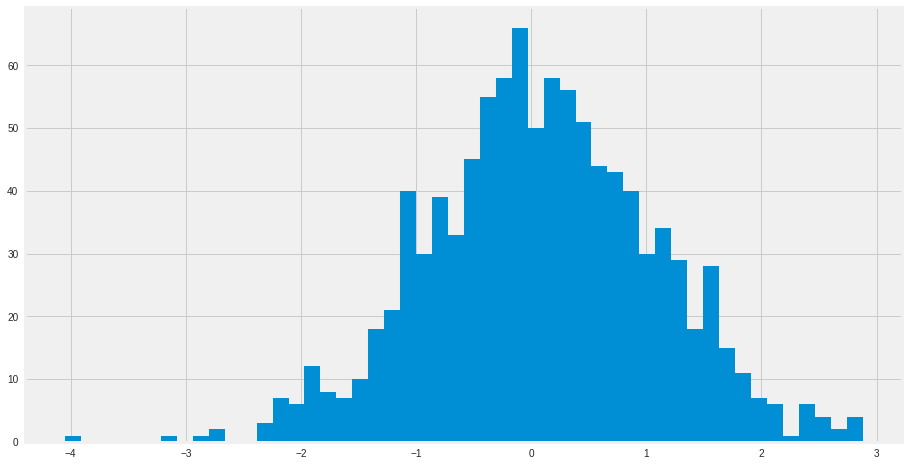

In [489]:
# Plot a histogram of several random normal samples from numpy
pd.Series(np.random.randn(1000)).hist(bins=50, figsize=(14,8))

#####  SKEWNESS
- Skewness is a measure of the asymmetry of the distribution of a random variable about its mean.
- Skewness can be positive or negative, or even undefined.
- Notice that the mean, median, and mode are the same when there is no skew
![skewness](assets/images/skewness---mean-median-mode.jpg)

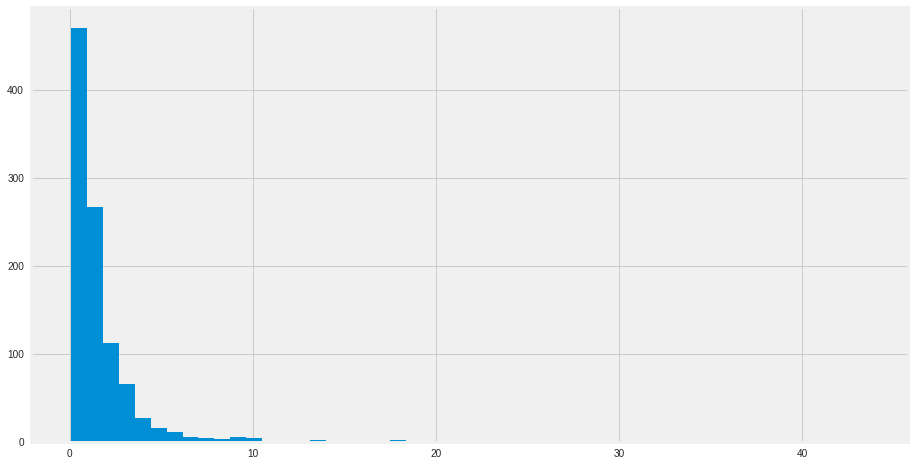

In [488]:
# Plot a lognormal distribution generated with numpy
pd.Series(np.random.lognormal(size=1000)).hist(bins=50, figsize=(14,8));

#####  Real World Application - When mindfullness beats complexity
- Skewness is surprisingly important.
- Most algorithms implicitly use the mean by default when making approximations.
- If you know your data is heavily skewed you may have to either transform your data or set your algorithms to work with the median.
- In the DIDI tech challenge, changing a few default options quickly put you in the 80th percentile, ahead of some very brilliant programmers who missed the basics. This amount to switch the algorithm from estimating a mean to estimating a median.

##### KURTOSIS
- Kurtosis is a measure of whether the data are peaked or flat relative to a normal distribution.
- Datasets with high kurtosis tend to have a distinct peak near the mean, decline rather rapidly, and have heavy tails. 

![kurtosis](assets/images/kurtosis.jpg)

#####  Real World Application - Risk Analysis
- Long-tailed distributions with high kurtosis elude intuition, we naturally think the event is too improbable to pay attention to
- It's often the case that there is a a large cost associated with the very low probability event as is the case with hurricane damage
- It's unlikely you will get hit by a category 5 hurricane, but when you do, the damage is catastrophic
- Pay attention to what happens at the tails and whether it influences the problem at hand
- In these cases understanding the costs may be more important than understanding the risks

## DETERMINING THE DISTRIBUTION OF YOUR DATA

Objective: Introduce histograms and density plots in Pandas

![](./assets/images/distributions.png)

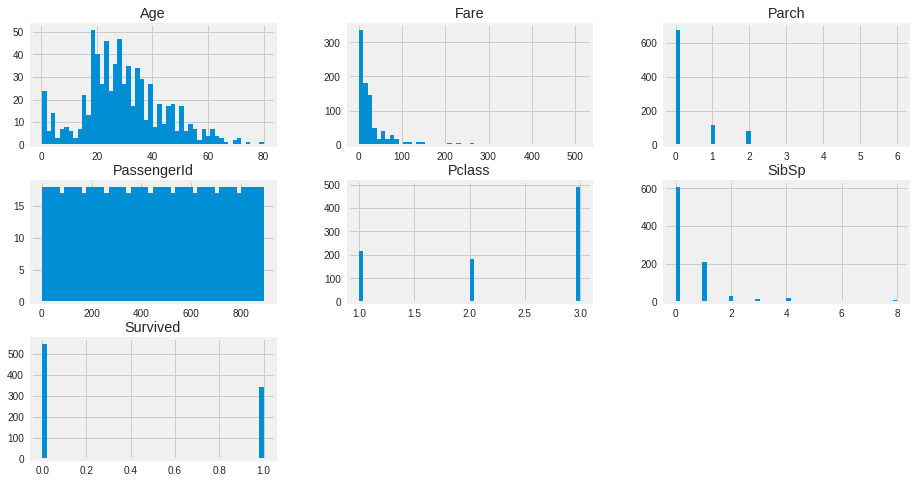

In [476]:
# Plot all variables in titanic using histograms
titanic.hist(figsize=(14, 8), bins=50);

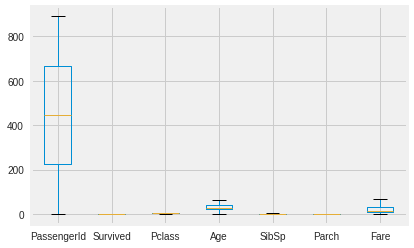

In [478]:
# Plotting all histograms can be unweildly, boxplots are more concise
titanic.plot.box(showfliers=False)

##### Exercise

In [ ]:
# Look at the titanic data variables
# Are any of them normal?
# Are any skewed?
# How might this affect our modeling?

![](./assets/images/visualization_flow_chart.jpg)

# TOPIC REVIEW
Today we looked at:
- Several different types of summary statistics, what are they?
- We covered three different types of visualizations, which ones?
- What are some important characteristics of distributions?

**Any further questions?**

# FURTHER READING
- I would recommend Think Stats (posted in slack under resources)
  - Covers fundamental statistics in a friendly way
  - Uses pandas for code examples